In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
raw_data = pd.read_csv("Salary.csv")
raw_data.head()

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Sweetwater,Alex,51,Male,United States,White,8/15/2011,Software Engineering,Software Engineering Manager,56160.0
1,Carabbio,Judith,30,Female,United States,White,11/11/2013,Software Engineering,Software Engineer,116480.0
2,Saada,Adell,31,Female,United States,White,11/5/2012,Software Engineering,Software Engineer,102440.0
3,Szabo,Andrew,34,Male,United States,White,7/7/2014,Software Engineering,Software Engineer,99840.0
4,Andreola,Colby,38,Female,United States,White,11/10/2014,Software Engineering,Software Engineer,99008.0


In [3]:
raw_data.describe(include='all')

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
count,174,174,174.000000,174,174,174,174,174,174,174.000000
unique,169,154,NaN,2,6,5,72,7,23,NaN
top,Smith,Michael,NaN,Female,United States,White,3/30/2015,Production,Production Technician I,NaN
freq,3,3,NaN,98,166,112,11,106,73,NaN
mean,NaN,NaN,37.793103,NaN,NaN,NaN,NaN,NaN,NaN,68603.779310
std,NaN,NaN,8.384734,NaN,NaN,NaN,NaN,NaN,NaN,34121.543021
min,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,29120.000000
25%,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,41600.000000
50%,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,52000.000000
75%,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,110240.000000


## Preprocessing the data

In [4]:
data = raw_data.drop(['Surname'], axis=1)

In [5]:
data = data.drop(['Name'], axis=1)

In [6]:
data.head()

,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,51,Male,United States,White,8/15/2011,Software Engineering,Software Engineering Manager,56160.0
1,30,Female,United States,White,11/11/2013,Software Engineering,Software Engineer,116480.0
2,31,Female,United States,White,11/5/2012,Software Engineering,Software Engineer,102440.0
3,34,Male,United States,White,7/7/2014,Software Engineering,Software Engineer,99840.0
4,38,Female,United States,White,11/10/2014,Software Engineering,Software Engineer,99008.0


In [7]:
data.describe(include='all')

,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
count,174.000000,174,174,174,174,174,174,174.000000
unique,NaN,2,6,5,72,7,23,NaN
top,NaN,Female,United States,White,3/30/2015,Production,Production Technician I,NaN
freq,NaN,98,166,112,11,106,73,NaN
mean,37.793103,NaN,NaN,NaN,NaN,NaN,NaN,68603.779310
std,8.384734,NaN,NaN,NaN,NaN,NaN,NaN,34121.543021
min,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,29120.000000
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,41600.000000
50%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,52000.000000
75%,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,110240.000000


In [8]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [9]:
data

,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,51,1,United States,White,8/15/2011,Software Engineering,Software Engineering Manager,56160.0
1,30,0,United States,White,11/11/2013,Software Engineering,Software Engineer,116480.0
2,31,0,United States,White,11/5/2012,Software Engineering,Software Engineer,102440.0
3,34,1,United States,White,7/7/2014,Software Engineering,Software Engineer,99840.0
4,38,0,United States,White,11/10/2014,Software Engineering,Software Engineer,99008.0
...,...,...,...,...,...,...,...,...
169,39,0,United States,Asian,9/29/2014,Production,Production Technician I,31200.0
170,49,0,Australia,Asian,5/14/2012,Production,Production Technician I,29120.0
171,39,0,United States,Asian,3/30/2015,IT/IS,Sr. Network Engineer,114816.0
172,33,0,United States,Asian,11/10/2014,IT/IS,Database Administrator,88920.0


In [10]:
data.corr()

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Gender,Salary
Age,1.000000,0.052283,0.030630
Gender,0.052283,1.000000,0.095683
Salary,0.030630,0.095683,1.000000


In [11]:
data = data.drop(['Department', 'Start_date', 'Country'], axis=1)

### Dealing with missing values

In [12]:
data.isnull().sum()

Age          0
Gender       0
Ethnicity    0
Position     0
Salary       0
dtype: int64

### Probability Function (Dealing with outliers)

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\580572721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

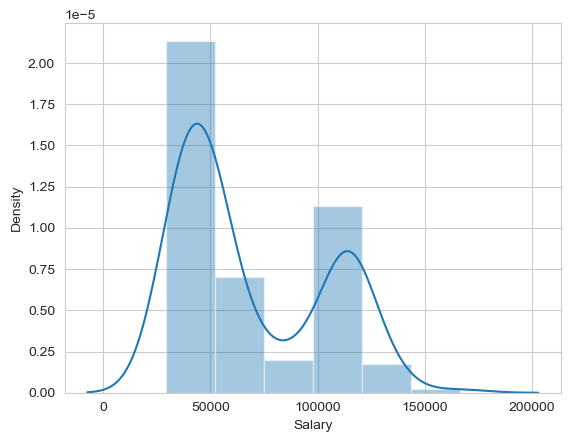

In [13]:
sns.distplot(data['Salary'])

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\1732534145.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

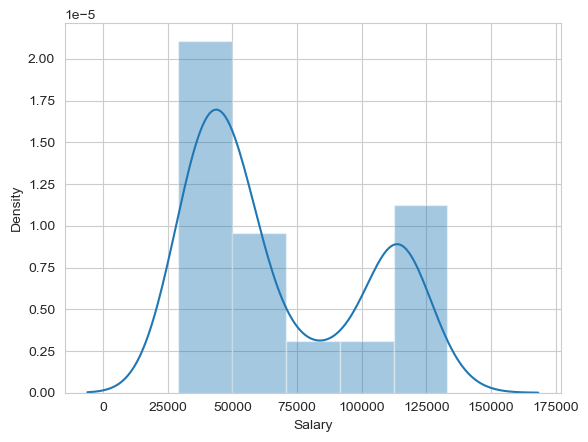

In [14]:
q = data['Salary'].quantile(0.99)
data = data[data['Salary']<q]
sns.distplot(data['Salary'])

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

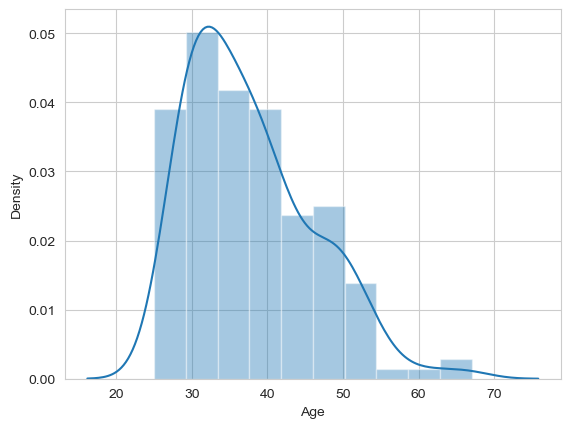

In [15]:
sns.distplot(data['Age'])

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\2765099441.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

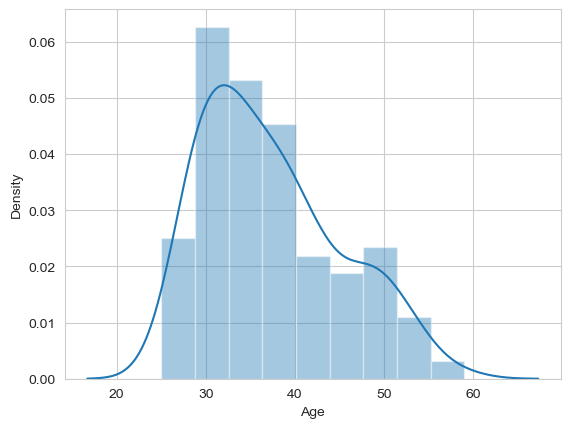

In [16]:
q = data['Age'].quantile(0.99)
data = data[data['Age']<q]
sns.distplot(data['Age'])

## Checking OLS

### Checking linearity

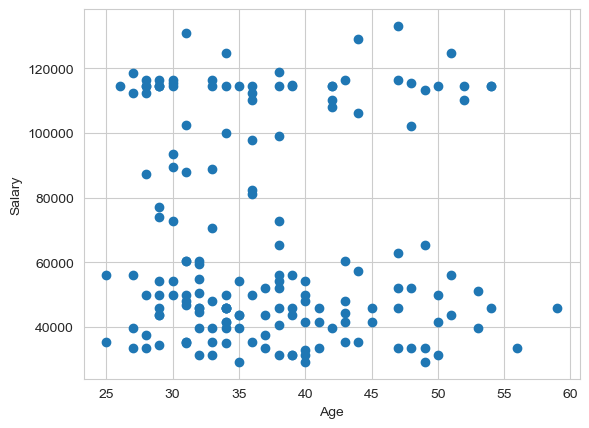

In [17]:
plt.scatter(data['Age'], data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

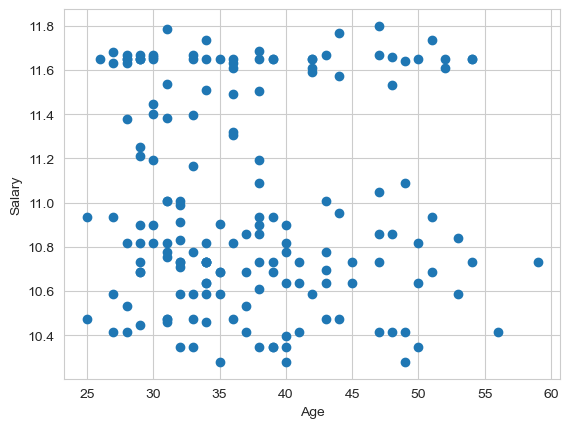

In [18]:
log_salary = np.log(data['Salary'])
data['log_salary'] = log_salary
plt.scatter(data['Age'], data['log_salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [19]:
data.head()

,Age,Gender,Ethnicity,Position,Salary,log_salary
0,51,1,White,Software Engineering Manager,56160.0,10.935960
1,30,0,White,Software Engineer,116480.0,11.665475
2,31,0,White,Software Engineer,102440.0,11.537033
3,34,1,White,Software Engineer,99840.0,11.511324
4,38,0,White,Software Engineer,99008.0,11.502956


### Checking multicollinearity

### Create dummies

In [20]:
data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies.head()

,Age,Gender,Salary,log_salary,Ethnicity_Black or African American,Ethnicity_Hispanic,Ethnicity_Two or more races,Ethnicity_White,Position_Administrative Assistant,Position_Area Sales Manager,...,Position_Network Engineer,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. Network Engineer
0,51,1,56160.0,10.935960,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30,0,116480.0,11.665475,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,31,0,102440.0,11.537033,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,34,1,99840.0,11.511324,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,38,0,99008.0,11.502956,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
data.describe(include='all')

,Age,Gender,Ethnicity,Position,Salary,log_salary
count,169.000000,169.000000,169,169,169.000000,169.000000
unique,NaN,NaN,5,20,NaN,NaN
top,NaN,NaN,White,Production Technician I,NaN,NaN
freq,NaN,NaN,108,72,NaN,NaN
mean,37.325444,0.437870,NaN,NaN,67168.861538,11.001594
std,7.715592,0.497599,NaN,NaN,32659.571965,0.472795
min,25.000000,0.000000,NaN,NaN,29120.000000,10.279181
25%,31.000000,0.000000,NaN,NaN,41600.000000,10.635855
50%,36.000000,0.000000,NaN,NaN,52000.000000,10.858999
75%,42.000000,1.000000,NaN,NaN,108160.000000,11.591367


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_1 = data_with_dummies.drop(['Salary', 'log_salary'], axis=1)

In [23]:
vif = pd.DataFrame(data=data_1.columns, columns=['Independent vari'])
vif['VIF'] = [variance_inflation_factor(data_1.values, i) for i in range(data_1.shape[1])]
vif.head()

,Independent vari,VIF
0,Age,22.579415
1,Gender,1.969979
2,Ethnicity_Black or African American,3.134083
3,Ethnicity_Hispanic,2.406623
4,Ethnicity_Two or more races,1.652477


In [24]:
vif

,Independent vari,VIF
0,Age,22.579415
1,Gender,1.969979
2,Ethnicity_Black or African American,3.134083
3,Ethnicity_Hispanic,2.406623
4,Ethnicity_Two or more races,1.652477
5,Ethnicity_White,7.715732
6,Position_Administrative Assistant,1.263192
7,Position_Area Sales Manager,4.450564
8,Position_Database Administrator,1.938564
9,Position_Director of Operations,1.156992


In [25]:
data_preprocessed = data_with_dummies.drop(['Age'], axis=1)

In [26]:
data_preprocessed = data_with_dummies.drop(['Position_Production Technician I'], axis=1)

In [27]:
data_preprocessed.head()

,Age,Gender,Salary,log_salary,Ethnicity_Black or African American,Ethnicity_Hispanic,Ethnicity_Two or more races,Ethnicity_White,Position_Administrative Assistant,Position_Area Sales Manager,...,Position_IT Support,Position_Network Engineer,Position_Production Manager,Position_Production Technician II,Position_Sales Manager,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. Network Engineer
0,51,1,56160.0,10.935960,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,30,0,116480.0,11.665475,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,31,0,102440.0,11.537033,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,34,1,99840.0,11.511324,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,38,0,99008.0,11.502956,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Linear Regression Model

In [28]:
target = data_preprocessed['log_salary']
inputs = data_preprocessed.drop(['Salary', 'log_salary', 'Age'], axis=1)

In [29]:
target.head()

0    10.935960
1    11.665475
2    11.537033
3    11.511324
4    11.502956
Name: log_salary, dtype: float64

In [30]:
inputs.head()

,Gender,Ethnicity_Black or African American,Ethnicity_Hispanic,Ethnicity_Two or more races,Ethnicity_White,Position_Administrative Assistant,Position_Area Sales Manager,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,...,Position_IT Support,Position_Network Engineer,Position_Production Manager,Position_Production Technician II,Position_Sales Manager,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. Network Engineer
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### R^2 and adjusted R^2

In [31]:
reg = LinearRegression()
reg.fit(inputs, target)
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
r2 = reg.score(inputs, target)
r2

0.927783056656416

In [33]:
inputs.shape
n = inputs.shape[0]
p = inputs.shape[1]

In [34]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9163279552984682

### Feature Selection

In [35]:
from sklearn.feature_selection import f_regression
p_value = f_regression(inputs, target)
p_value = p_value[1].round(3)
f_select = pd.DataFrame(data=inputs.columns, columns=['Features'])
f_select['P-value'] = p_value

In [36]:
f_select

,Features,P-value
0,Gender,0.252
1,Ethnicity_Black or African American,0.486
2,Ethnicity_Hispanic,0.036
3,Ethnicity_Two or more races,0.722
4,Ethnicity_White,0.472
5,Position_Administrative Assistant,0.203
6,Position_Area Sales Manager,0.000
7,Position_Database Administrator,0.193
8,Position_Director of Operations,0.120
9,Position_Director of Sales,0.120


## Standarlize the data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 1.13304183, -0.51107145, -0.10943513, ..., 12.9614814 ,
        -0.10943513, -0.10943513],
       [-0.88257995, -0.51107145, -0.10943513, ..., -0.07715167,
        -0.10943513, -0.10943513],
       [-0.88257995, -0.51107145, -0.10943513, ..., -0.07715167,
        -0.10943513, -0.10943513],
       ...,
       [-0.88257995, -0.51107145, -0.10943513, ..., -0.07715167,
        -0.10943513,  9.13783344],
       [-0.88257995, -0.51107145, -0.10943513, ..., -0.07715167,
        -0.10943513, -0.10943513],
       [-0.88257995, -0.51107145, -0.10943513, ..., -0.07715167,
         9.13783344, -0.10943513]])

## Train and split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [39]:
reg2 =LinearRegression()
reg2.fit(x_train, y_train)
reg2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

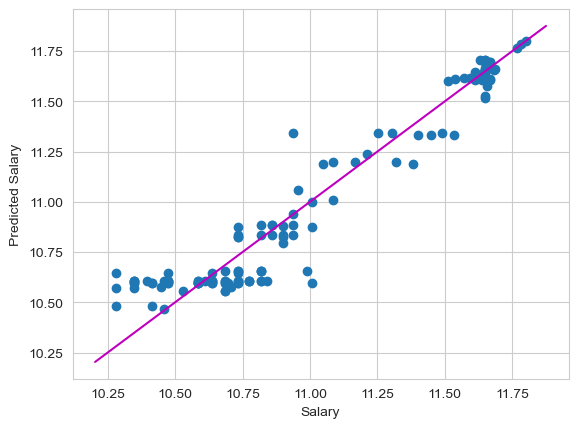

In [41]:
yhat = reg2.predict(x_train)
plt.scatter(y_train, yhat)
left, right = plt.xlim()
bottom, top = plt.ylim()
axlim = (min(bottom, left), max(top, right))
xpoints2 = ypoints2 = np.linspace(axlim[0], axlim[1])
plt.plot(xpoints2, ypoints2, color="m", label="xlim and ylim")
plt.xlabel("Salary")
plt.ylabel("Predicted Salary")
plt.show()

### Reisdual

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\463478360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yhat)


<Axes: xlabel='log_salary', ylabel='Density'>

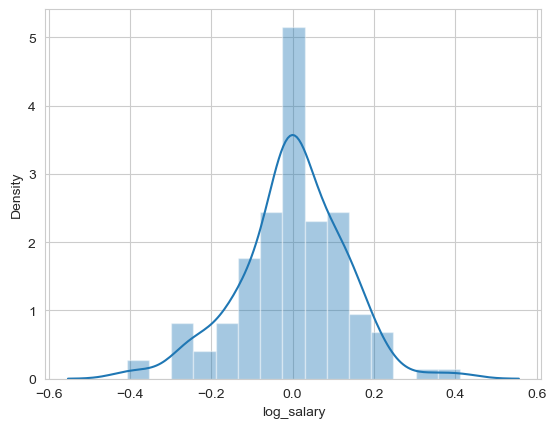

In [42]:
sns.distplot(y_train - yhat)

In [43]:
reg2.score(x_train, y_train)

0.9268722646531672

### Finding weights and bias

In [44]:
reg2.coef_

array([-5.40112943e-03,  3.57656349e-02,  4.84603887e-03, -2.01461965e-02,
        1.81702666e-02, -3.10590600e-03,  3.52692152e-01,  1.18146310e-01,
       -9.23104760e+11,  2.29601202e+11,  8.95514398e-02,  9.05541568e-02,
        9.22822310e-02,  6.11896919e-02,  1.56469349e-01,  2.26758649e-01,
        7.80686021e-02,  1.10588241e-01,  8.06473610e-02,  1.86006563e-01,
        2.65293568e-02,  2.76031477e+12,  1.13498708e-01])

In [45]:
reg.intercept_

10.594147866503105

In [46]:
Summary_table = pd.DataFrame(data=inputs.columns, columns=['Features'])
Summary_table['Weights'] = reg2.coef_
Summary_table['Weights'] = Summary_table['Weights'].round(3)
Summary_table

,Features,Weights
0,Gender,-5.000000e-03
1,Ethnicity_Black or African American,3.600000e-02
2,Ethnicity_Hispanic,5.000000e-03
3,Ethnicity_Two or more races,-2.000000e-02
4,Ethnicity_White,1.800000e-02
5,Position_Administrative Assistant,-3.000000e-03
6,Position_Area Sales Manager,3.530000e-01
7,Position_Database Administrator,1.180000e-01
8,Position_Director of Operations,-9.231048e+11
9,Position_Director of Sales,2.296012e+11


In [47]:
raw_data['Position'].unique()

array(['Software Engineering Manager', 'Software Engineer',
       'Sales Manager', 'Director of Sales', 'Area Sales Manager',
       'Production Technician II', 'Production Technician I',
       'Production Manager', 'Sr. Network Engineer', 'Network Engineer',
       'IT Support', 'IT Manager - Support', 'IT Manager - DB',
       'Database Administrator', 'CIO', 'President & CEO',
       'Sr. Accountant', 'Shared Services Manager',
       'Administrative Assistant', 'Accountant I', 'IT Manager - Infra',
       'Director of Operations', 'IT Director'], dtype=object)

In [48]:
raw_data['Ethnicity'].unique()

array(['White', 'Two or more races', 'Hispanic',
       'Black or African American', 'Asian'], dtype=object)

## Testing

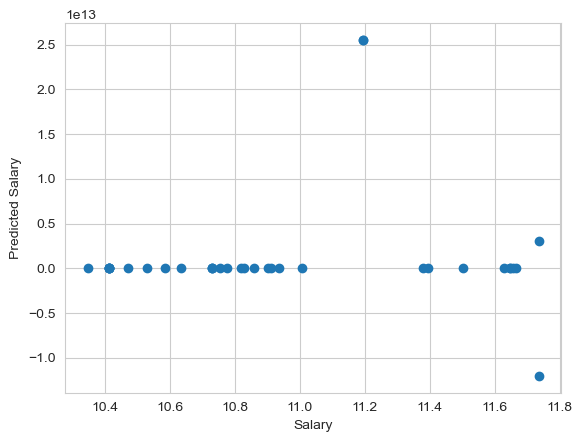

In [49]:
yhat_test = reg2.predict(x_test)
plt.scatter(y_test, yhat_test)
plt.xlabel("Salary")
plt.ylabel("Predicted Salary")
plt.show()

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\2528691797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - yhat_test)


<Axes: xlabel='log_salary', ylabel='Density'>

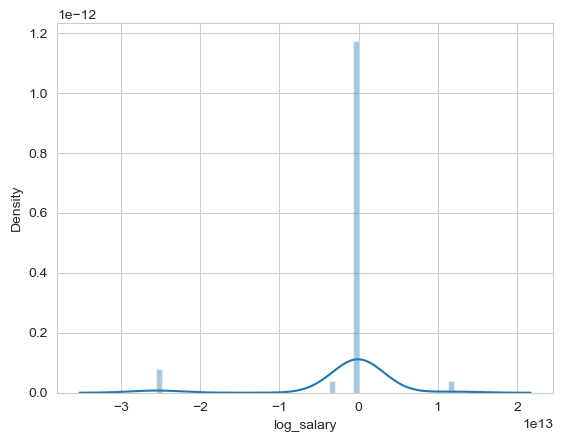

In [50]:
sns.distplot(y_test - yhat_test)

## Summary Table

In [51]:
y_test.reset_index(drop=True)
df_pt = pd.DataFrame(data=np.exp(y_test.values), columns=['Salary'])
df_pt['Preidcted Salary'] = np.exp(yhat_test)
df_pt

C:\Users\42128\AppData\Local\Temp\ipykernel_23536\1799670682.py:3: RuntimeWarning: overflow encountered in exp
  df_pt['Preidcted Salary'] = np.exp(yhat_test)


,Salary,Preidcted Salary
0,33280.0,4.039929e+04
1,47840.0,4.202913e+04
2,54288.0,5.335402e+04
3,52000.0,4.416999e+04
4,33280.0,4.039929e+04
5,35360.0,4.039929e+04
6,114400.0,1.014337e+05
7,33280.0,3.996275e+04
8,39520.0,4.248953e+04
9,37440.0,3.996275e+04
